# Partie 4 : Envoi d'un satellite autour de Mars

Dans cette partie, nous simulons l'envoi d'un satellite autour de Mars.

In [59]:
import numpy as np
import pandas as pd
planete = np.zeros((2,3))
planete[0] = np.array([1044*10e2,150*10e6,0])
planete[1] = np.array([864*10e2,228*10e6,0])
for i in range(2):
    planete[i,2] = 1000*planete[i,0]/planete[i,1]

espace=pd.DataFrame(planete,index=["Terre","Mars"],columns=['Vitesse (km/h)','Rayon (km)','Angle de départ (radian)'])

espace.style.format({"Vitesse (km/h)":"{:.3e}","Rayon (km)":"{:.3e}"})

,Vitesse (km/h),Rayon (km),Angle de départ (radian)
Terre,1.044e+06,1.500e+09,0.696000
Mars,8.640e+05,2.280e+09,0.378947


In [60]:
distanceTM = planete[1,1] - planete[0,1] #km
vitesseF = 3.5 #km/s

In [61]:
tTM = distanceTM/vitesseF #secondes
tTM = tTM / 3600 #heures

In [62]:
def position(t,p,col,i = 0):
    return point2d((p[1]*cos(t*p[2]+i),p[1]*sin(t*p[2]+i)),size = 50,color = col)

In [63]:
def init(t):
    S = position(t,planete[0],"blue",pi/2)
    S += position(t,planete[1],"red")  
    return S

In [64]:
def syst():
    s = point2d((0,0), size = 1000, color ='yellow',axes = False)
    for i in range(2):
        s += circle((0,0),planete[i][1], color = 'black')
    return s

In [87]:
def orbiteSonde(t):
    p = planete[1]
    r = 500000000/4
    va = 100000000*vitesseF/r
    xT = p[1]*cos(t*p[2])
    yT = p[1]*sin(t*p[2])
    xL = r*cos(-t*va+2*pi/3) 
    yL = r*sin(-t*va+2*pi/3)
    x = xT + xL
    y = yT + yL
    return point2d((x,y), size = 10, color = "grey")

In [85]:
def sonde(t,vitesseF,tps):
    if t*1000 < tps:
        return point2d((planete[0,1]*cos(t*planete[0,2]+pi/2),planete[0,1]*sin(t*planete[0,2]+pi/2)))
    elif t*1000 > tps + 4800:
        return orbiteSonde(t)
    k = t-tps/1000
    d = distanceTM
    d /= 5
    return point2d(((planete[0,1]+k*d)*cos((tps+1)*planete[0,2]+pi/2),(planete[0,1]+k*d)*sin((tps+1)*planete[0,2]+pi/2)),color = 'grey')

Animation with 310 frames
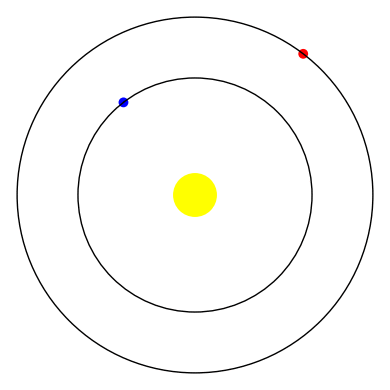

In [89]:
a= [init(t/10) + syst() + sonde(t/10,vitesseF,21000) for t in range(190,500)]
animate(a)